#Model Interpretability
The following tasks are to be completed in the assignement:

Fit a linear model and interpret the regression coefficients

Fit a tree-based model and interpret the nodes

Use auto ml to find the best model

Run SHAP analysis on the models from steps 1, 2, and 3, interpret the SHAP values and compare them with the other model interpretability methods

#Abstract
What is the dataset about ?

The main goal is to predict power consumption based on various paramters

We analyze the SHAP analysis, by following 3 methods

In [ ]:
# Importing all libraries necessary for the assignment
!pip install shap
!pip install lime
!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future
!pip install h2o
import pandas as pd
import numpy as np
import shap
import lime
from lime import lime_tabular
import sklearn
from sklearn.model_selection import train_test_split
import random
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import partial_dependence
from matplotlib.pyplot import figure
from sklearn.tree import export_graphviz
import pydot
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import h2o
from h2o.automl import H2OAutoML
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.grid.grid_search import H2OGridSearch
import random, os, sys
from datetime import datetime
import pandas as pd
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import numpy as np
from matplotlib.pyplot import figure
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (32, 24)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 KB 6.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283859 sha256=7b8d003d665806d88ec28ebb7b4d23d276f17fc8e8d2993f9f9e556202f8d4ad
  Stored in directory: /root/.cache/pip/wheels/ed/d7/c9/5a0130d06d6310bc6cbe55220e6e72dcb8c4eff9a478717066
Successfully built lime
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Look

In [ ]:
min_mem_size = 6
run_time = 222

In [ ]:
pct_memory = 0.5
virtual_memory = psutil.virtual_memory()
min_mem_size = int(round(int(pct_memory * virtual_memory.available) / 1073741824, 0))
print(min_mem_size)

6


In [ ]:
port_no = random.randint(5555, 55555)

#  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
try:
    h2o.init(
        strict_version_check=False, min_mem_size_GB=min_mem_size, port=port_no
    )  # start h2o
except:
    logging.critical("h2o.init")
    h2o.download_all_logs(dirname=logs_path, filename=logfile)
    h2o.cluster().shutdown()
    sys.exit(2)

Checking whether there is an H2O instance running at http://localhost:26458..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.18" 2023-01-17; OpenJDK Runtime Environment (build 11.0.18+10-post-Ubuntu-0ubuntu120.04.1); OpenJDK 64-Bit Server VM (build 11.0.18+10-post-Ubuntu-0ubuntu120.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.9/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpf17pxid9
  JVM stdout: /tmp/tmpf17pxid9/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpf17pxid9/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:26458
Connecting to H2O server at http://127.0.0.1:26458 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.2
H2O_cluster_version_age:,15 days
H2O_cluster_name:,H2O_from_python_unknownUser_fgx0sg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/pravallika-pilla/DataScience/main/PowerGeneration.csv")

In [ ]:
df.head()

,Date,Power Station,Monitored Cap.(MW),Total Cap. Under Maintenace (MW),Planned Maintanence (MW),Forced Maintanence(MW),Other Reasons (MW),Programme (MW),Actual (MW),Excess(+) / Shortfall (-) (MW),Deviation (MW)
0,01-09-2017,Delhi,2235.4,135.0,0.0,135.0,0.0,13.29,18.29,5.00,37.62
1,01-09-2017,STPL,1350.0,1350.0,0.0,1350.0,0.0,0.00,0.00,0.00,0.00
2,01-09-2017,SPPL,150.0,150.0,0.0,150.0,0.0,0.00,0.00,0.00,0.00
3,01-09-2017,SPL,3960.0,0.0,0.0,0.0,0.0,92.13,96.16,4.03,4.37
4,01-09-2017,SKS,600.0,300.0,0.0,300.0,0.0,6.84,7.18,0.34,4.97


In [ ]:
df.rename(columns={"Actual (MW)": "Actual_MW"})

,Date,Power Station,Monitored Cap.(MW),Total Cap. Under Maintenace (MW),Planned Maintanence (MW),Forced Maintanence(MW),Other Reasons (MW),Programme (MW),Actual_MW,Excess(+) / Shortfall (-) (MW),Deviation (MW)
0,01-09-2017,Delhi,2235.4,135.0,0.0,135.0,0.0,13.29,18.29,5.00,37.62
1,01-09-2017,STPL,1350.0,1350.0,0.0,1350.0,0.0,0.00,0.00,0.00,0.00
2,01-09-2017,SPPL,150.0,150.0,0.0,150.0,0.0,0.00,0.00,0.00,0.00
3,01-09-2017,SPL,3960.0,0.0,0.0,0.0,0.0,92.13,96.16,4.03,4.37
4,01-09-2017,SKS,600.0,300.0,0.0,300.0,0.0,6.84,7.18,0.34,4.97
...,...,...,...,...,...,...,...,...,...,...,...
334989,01-09-2017,TATA PCL,1430.0,500.0,0.0,500.0,0.0,16.50,16.98,0.48,2.91
334990,01-09-2017,TATA MAH.,447.0,0.0,0.0,0.0,0.0,4.29,3.96,-0.33,-7.69
334991,01-09-2017,SVPPL,63.0,0.0,0.0,0.0,0.0,0.00,1.22,1.22,0.00
334992,01-09-2017,BELLARY,25.2,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00


In [ ]:
!pip install shap
# Required Libraries
import pandas as pd
#linear algebra
import numpy as np 
import math

#data tools
from copy import copy
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
from sklearn.metrics import r2_score

#plots
import matplotlib.pyplot as plt

#models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

#Shap
import shap

#metrics
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
from sklearn.metrics import r2_score


%matplotlib inline


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.4/572.4 KB 8.9 MB/s eta 0:00:00


In [ ]:
# Dataset is hosted on my github repository
url = "https://raw.githubusercontent.com/pravallika-pilla/DataScience/main/PowerGeneration.csv"
df = pd.read_csv(url)

In [ ]:
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [ ]:
df.head()

,Date,Power Station,Monitored Cap.(MW),Total Cap. Under Maintenace (MW),Planned Maintanence (MW),Forced Maintanence(MW),Other Reasons (MW),Programme (MW),Actual (MW),Excess(+) / Shortfall (-) (MW),Deviation (MW)
0,01-09-2017,Delhi,2235.4,135.0,0.0,135.0,0.0,13.29,18.29,5.00,37.62
1,01-09-2017,STPL,1350.0,1350.0,0.0,1350.0,0.0,0.00,0.00,0.00,0.00
2,01-09-2017,SPPL,150.0,150.0,0.0,150.0,0.0,0.00,0.00,0.00,0.00
3,01-09-2017,SPL,3960.0,0.0,0.0,0.0,0.0,92.13,96.16,4.03,4.37
4,01-09-2017,SKS,600.0,300.0,0.0,300.0,0.0,6.84,7.18,0.34,4.97


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334994 entries, 0 to 334993
Data columns (total 11 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   Date                              334994 non-null  object 
 1   Power Station                     334994 non-null  object 
 2   Monitored Cap.(MW)                334994 non-null  float64
 3   Total Cap. Under Maintenace (MW)  334994 non-null  float64
 4   Planned Maintanence (MW)          334994 non-null  float64
 5   Forced Maintanence(MW)            334994 non-null  float64
 6   Other Reasons (MW)                334994 non-null  float64
 7   Programme (MW)                    334994 non-null  float64
 8   Actual (MW)                       334994 non-null  float64
 9   Excess(+) / Shortfall (-) (MW)    334994 non-null  float64
 10  Deviation (MW)                    334994 non-null  float64
dtypes: float64(9), object(2)
memory usage: 28.1+ MB


In [ ]:
target = df['Actual (MW)']

In [ ]:
features = df[['Monitored Cap.(MW)','Total Cap. Under Maintenace (MW)','Planned Maintanence (MW)','Forced Maintanence(MW)','Other Reasons (MW)','Programme (MW)','Excess(+) / Shortfall (-) (MW)']]

In [ ]:
datasetClean = pd.concat([features,target], axis = 1, join = 'inner')

In [ ]:
datasetClean.isna().sum()

Monitored Cap.(MW)                  0
Total Cap. Under Maintenace (MW)    0
Planned Maintanence (MW)            0
Forced Maintanence(MW)              0
Other Reasons (MW)                  0
Programme (MW)                      0
Excess(+) / Shortfall (-) (MW)      0
Actual (MW)                         0
dtype: int64

In [ ]:
target.shape

(334994,)

In [ ]:
features.shape

(334994, 7)

In [ ]:
df = df.reset_index()

In [ ]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

This line of code replaces all occurrences of positive and negative infinity in DataFrame df with NaN.

In this case, the first argument is a list containing np.inf and -np.inf, which represent positive and negative infinity, respectively. The second argument is np.nan, which is a special floating-point value used to represent missing or undefined data in Pandas. Finally, the inplace flag is set to True, which means that the modifications will be made to the original DataFrame df, rather than returning a new modified DataFrame.



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.33, random_state=42)

In [ ]:
X_train.head()

,Monitored Cap.(MW),Total Cap. Under Maintenace (MW),Planned Maintanence (MW),Forced Maintanence(MW),Other Reasons (MW),Programme (MW),Excess(+) / Shortfall (-) (MW)
95356,515.0,515.0,0.0,0.0,515.0,0.00,0.00
214961,4955.0,750.0,15.0,735.0,0.0,61.72,6.98
251256,1980.0,660.0,0.0,660.0,0.0,33.79,-16.45
265801,325.0,25.0,0.0,25.0,0.0,5.57,0.97
29996,1200.0,0.0,0.0,0.0,0.0,25.00,0.74


In [ ]:
y_train.shape

(224445,)

#1. Fit a linear model and interpret the regression coefficients

Linear Mode

In [ ]:
import statsmodels.api as sm

lin_reg = sm.OLS(y_train,X_train).fit()

In [ ]:
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            Actual (MW)   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          6.030e+14
Date:                Sat, 25 Mar 2023   Prob (F-statistic):                        0.00
Time:                        18:11:06   Log-Likelihood:                      1.4906e+06
No. Observations:              224445   AIC:                                 -2.981e+06
Df Residuals:                  224438   BIC:                                 -2.981e+06
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Monitored Cap.(MW)                3.822e-10   1.58e-09      0.241      0.809   -2.72e-09    3.49e-09
Total Cap. Under Maintenace (MW)    -0.0002      0.001     -0.154      0.878      -0.003       0.003
Planned Maintanence (MW)             0.0002      0.001      0.154      0.878      -0.003       0.003
Forced Maintanence(MW)               0.0002      0.001      0.154      0.878      -0.003       0.003
Other Reasons (MW)                   0.0002      0.001      0.154      0.878      -0.003       0.003
Programme (MW)                       1.0000    8.5e-08   1.18e+07      0.000       1.000       1.000
Excess(+) / Shortfall (-) (MW)       1.0000   9.87e-08   1.01e+07      0.000       1.000       1.000
==============================================================================
Omnibus:                   284578.717   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       9323578593.162
Skew:                          -5.357   Prob(JB):                         0.00
Kurtosis:                    1001.428   Cond. No.                     1.40e+07
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.4e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#Interpreting Regression Co-efficients

## Model Co-efficients

The positive or negative value of a co-eficient tells us if there is a positve or a negtive correlationship between the target and predictors. A positive value indicates that the value of target increases if the value of co-efficient increases and vice-versa. Whereas the negative values indicates that the value of target increases if the value of co-efficient decreases and vice versa.

As seen in the co-efficient coloumn in the above table

Value for the variable Monitored Cap.(MW) is highest = 3.822e-10
Followed by Programme (MW) = 1
High absolute values of co-efficients can be used to get an idea of the importance of variables in a linear regression. Here, as stated above Monitored Cap.(MW) and Programme (MW) seems to be the most important variables to predict target i.e. customer acquisition cost.

Also, it signifies that Higher the value of SRP and unit_sales - better is the sales.

##P-Values

If the p-value is 0.05 or lower, the result is trumpeted as significant, but if it is higher than 0.05, the result is non-significant

Programme (MW)
Excess(+) / Shortfall (-) (MW)

These variables have P-Value less that 0.05, hence it can be interpreted that these variables are significant variables and any change to this variables have significant impact on the target (Actual Power (MW)).

##Skew and Kurtosis

Skewness tells us the amount and direction of skew(Departure from the central axis) and Kurtosis tells us how tall and sharp the central peak is. The optimum value for these two measures is 0, in our case we have a value for Skew and Kurtosis as -5.357, 1001.428 respectively.

##Durbin-Watson

The Durbin-Watson test is a statistical test to detect auto-correlation in the residuals of a regression analysis. Its range is 0 to 4.

Value of 2 indicates that no auto correlation is detected
Value between 0 to 2 indicates that there is positive auto correlation detected
Value between 2 to 4 indicates that there is negatibe auto correlation detected
Our model has a DW score of 2 which could be interpreted as a positive auto-correlation in the residuals of regression.

##Jarque-Bera Test

The JB test is known as the test of Normality, irrespective if the data has skew or kurtosis. If it is far from zero, it signals the data do not have a normal distribution. Our JB value is 9323578593.162 which again re-inforces the interpretation we got from Skew and Kurtosis.

In [ ]:
lr_pred = lin_reg.predict(X_test)

In [ ]:
print('Linear Model - Test')
print('MAE: %f'% mean_absolute_error(y_test, lr_pred))
print('RMSE: %f'% np.sqrt(mean_squared_error(y_test, lr_pred)))   
print('R2 %f' % r2_score(y_test, lr_pred))

Linear Model - Test
MAE: 0.000015
RMSE: 0.000352
R2 1.000000


#Interpretation of model coefficients:

Prob(F- Statistic) = 0.00 indicates that our model is satatistically significant an all significace levels.

R squared value of 1 indicate that 100% of the data is explained/fit by the model.

#2. Fit a tree-based model and interpret the nodes
Tree based Model

In [ ]:
from sklearn.tree import DecisionTreeRegressor
DTree=DecisionTreeRegressor(max_depth=3, random_state=1234)
DTree.fit(X_train,y_train)

DTree_score = DTree.score(X_test, y_test)
print(DTree_score)

0.9338184406927289


In [ ]:
from sklearn.metrics import r2_score,mean_absolute_error
def model_sel(model):
    y_pred = model.predict(X_test)
    print("MODEL EVALUATION")
    print("\nr2_score of the model: ")
    print(r2_score(y_test,y_pred))

In [ ]:
# Model Evaluation on DecisionTreeRegressor
print("DECISION TREE REGRESSION: ")
print("-x"*25)
model_sel(DTree)

DECISION TREE REGRESSION: 
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x
MODEL EVALUATION

r2_score of the model: 
0.9338184406927289


In [ ]:
prediction_tree = DTree.predict(X_test)

In [ ]:
#Checking accuracy of predictions
print('Decision tree')
print('MAE: %f'% mean_absolute_error(y_test, prediction_tree))
print('RMSE: %f'% np.sqrt(mean_squared_error(y_test, prediction_tree)))   
print('R2 %f' % r2_score(y_test, prediction_tree))

Decision tree
MAE: 5.325760
RMSE: 9.882737
R2 0.933818


MAE (Mean Absolute Error): It measures the average absolute difference between the predicted and actual values. It is expressed in the same units as the target variable and represents the average magnitude of the errors in the predictions. A lower MAE indicates a better fit of the model to the data.In our case the MAE rate is 5.325760 which is GOOD

RMSE (Root Mean Squared Error): It is similar to MAE, but it takes the square root of the average of the squared differences between the predicted and actual values. It penalizes larger errors more heavily than smaller ones and is also expressed in the same units as the target variable. A lower RMSE also indicates a better fit of the model to the data. Here the RMSE rate is 9.882737 which showcases how the differences are set aside.

R2 score (Coefficient of determination): It measures the proportion of variance in the target variable that can be explained by the predictor variables in the model. It ranges from 0 to 1, with a higher value indicating a better fit of the model to the data. An R2 score of 1 means that the model perfectly predicts the target variable, while a score of 0 means that the model provides no improvement over the mean value of the target variable. In our case we got the R2 score at 0.933818

[Text(0.5, 0.875, 'Programme (MW) <= 61.835\nsquared_error = 1486.224\nsamples = 224445\nvalue = 19.758'),
 Text(0.25, 0.625, 'Programme (MW) <= 14.02\nsquared_error = 161.983\nsamples = 201322\nvalue = 9.294'),
 Text(0.125, 0.375, 'Programme (MW) <= 5.25\nsquared_error = 29.259\nsamples = 149389\nvalue = 3.737'),
 Text(0.0625, 0.125, 'squared_error = 5.497\nsamples = 101680\nvalue = 1.124'),
 Text(0.1875, 0.125, 'squared_error = 34.318\nsamples = 47709\nvalue = 9.307'),
 Text(0.375, 0.375, 'Programme (MW) <= 36.26\nsquared_error = 199.369\nsamples = 51933\nvalue = 25.281'),
 Text(0.3125, 0.125, 'squared_error = 94.303\nsamples = 44473\nvalue = 21.352'),
 Text(0.4375, 0.125, 'squared_error = 185.018\nsamples = 7460\nvalue = 48.704'),
 Text(0.75, 0.625, 'Programme (MW) <= 152.385\nsquared_error = 3763.69\nsamples = 23123\nvalue = 110.856'),
 Text(0.625, 0.375, 'Excess(+) / Shortfall (-) (MW) <= -4.655\nsquared_error = 679.163\nsamples = 18451\nvalue = 86.42'),
 Text(0.5625, 0.125, 'squa

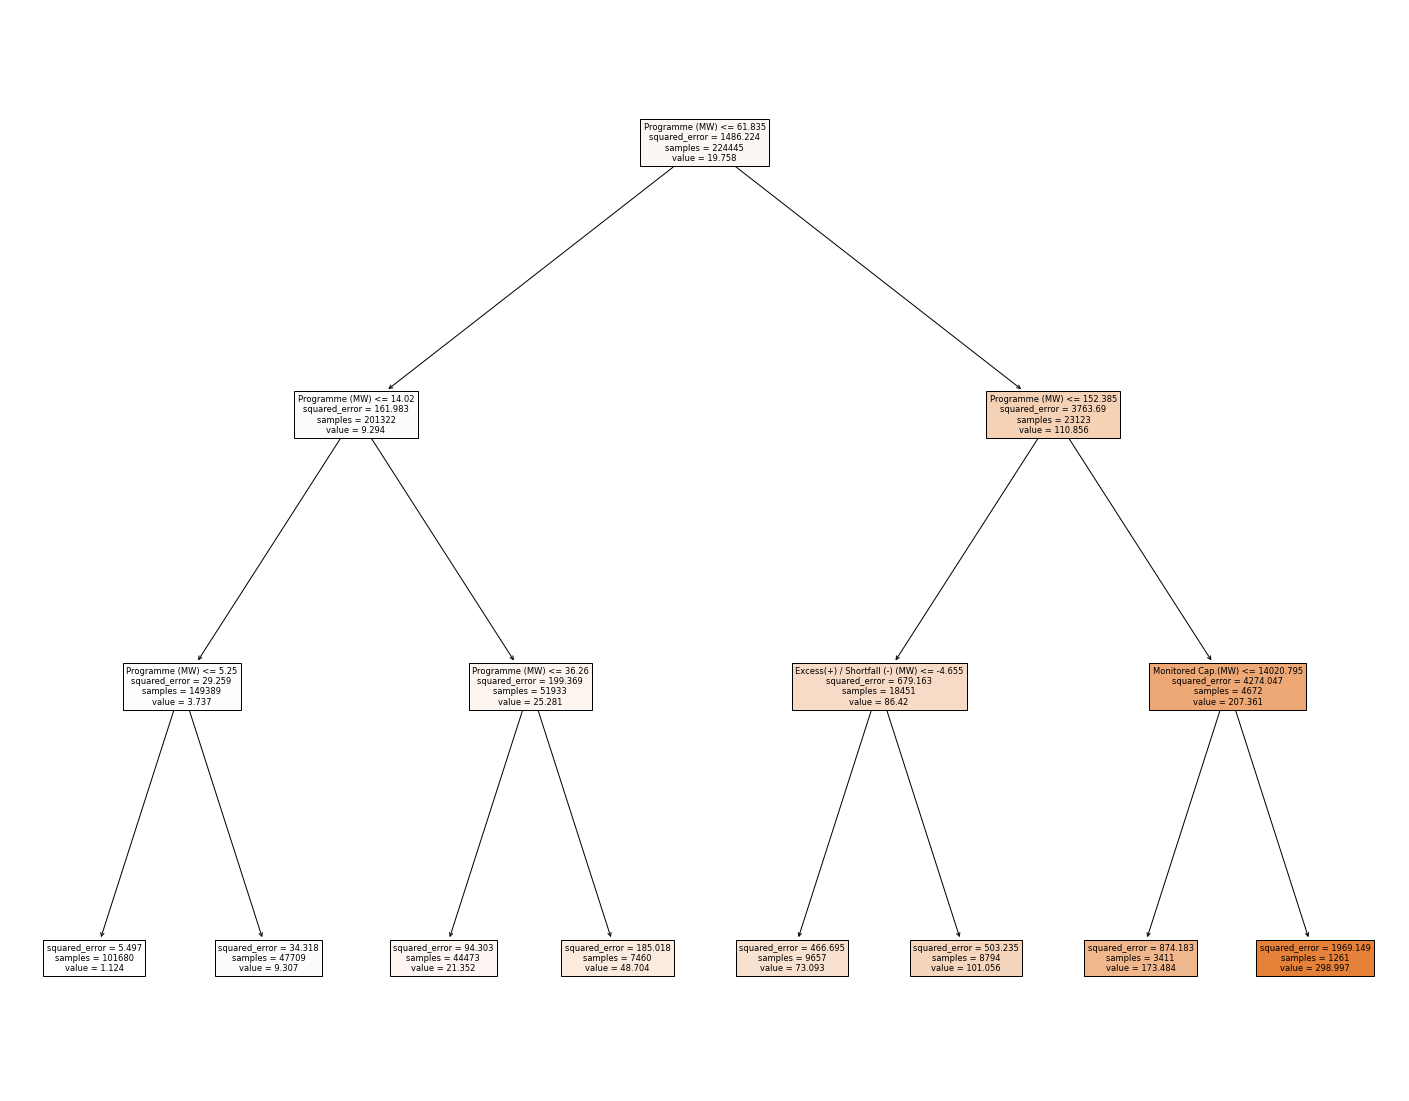

In [ ]:
from sklearn import tree
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(25,20))
tree.plot_tree(DTree, feature_names= features.columns, filled=True)


#3. Use auto ml to find the best model
AutoML

In [ ]:
import h2o
from h2o.automl import H2OAutoML

In [ ]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.18" 2023-01-17; OpenJDK Runtime Environment (build 11.0.18+10-post-Ubuntu-0ubuntu120.04.1); OpenJDK 64-Bit Server VM (build 11.0.18+10-post-Ubuntu-0ubuntu120.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.9/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpt_bxu9vw
  JVM stdout: /tmp/tmpt_bxu9vw/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpt_bxu9vw/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.2
H2O_cluster_version_age:,16 days
H2O_cluster_name:,H2O_from_python_unknownUser_ve6fx3
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.172 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [ ]:
datasetClean.isna().sum()

Monitored Cap.(MW)                  0
Total Cap. Under Maintenace (MW)    0
Planned Maintanence (MW)            0
Forced Maintanence(MW)              0
Other Reasons (MW)                  0
Programme (MW)                      0
Excess(+) / Shortfall (-) (MW)      0
Actual (MW)                         0
dtype: int64

In [ ]:
#Reducing the size of the dataset to 50% due to permormance issues with my hardware
dataset_train = datasetClean.sample(frac=.2)
dataset_test = datasetClean.drop(dataset_train.index)

In [ ]:
dataset_train.shape

(66999, 8)

In [ ]:
dataset_test = dataset_test.sample(frac=.5)

In [ ]:
dataset_train.isna().sum()

Monitored Cap.(MW)                  0
Total Cap. Under Maintenace (MW)    0
Planned Maintanence (MW)            0
Forced Maintanence(MW)              0
Other Reasons (MW)                  0
Programme (MW)                      0
Excess(+) / Shortfall (-) (MW)      0
Actual (MW)                         0
dtype: int64

In [ ]:
features_autoML = list(features.columns)
features_autoML

['Monitored Cap.(MW)',
 'Total Cap. Under Maintenace (MW)',
 'Planned Maintanence (MW)',
 'Forced Maintanence(MW)',
 'Other Reasons (MW)',
 'Programme (MW)',
 'Excess(+) / Shortfall (-) (MW)']

In [ ]:
target_autoML = 'Actual (MW)'

In [ ]:
#Converting from pandas dataframe to Automl Dataset
datasetAutoML = h2o.H2OFrame(dataset_train)
datasetAutoMLTest = h2o.H2OFrame(dataset_test)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
datasetAutoML.head()

Monitored Cap.(MW),Total Cap. Under Maintenace (MW),Planned Maintanence (MW),Forced Maintanence(MW),Other Reasons (MW),Programme (MW),Excess(+) / Shortfall (-) (MW),Actual (MW)
220,220,0,0,220,0,0,0
1350,810,0,810,0,15.26,-2.21,13.05
12614.1,4096.3,610,3377,109.3,172.5,0.79,173.29
10730,1460,0,1460,0,185.91,-4.73,181.18
3826.3,2150,1010,1140,0,33.28,-8.25,25.03
1458,1220,0,0,1220,1.65,2.19,3.84
96,0,0,0,0,2.16,0.24,2.4
25.2,0,0,0,0,0,0,0
1200,0,0,0,0,17.78,5.75,23.53
270,270,0,270,0,0,0,0


In [ ]:
aml = H2OAutoML()
aml.train(x = features_autoML, y = target_autoML, training_frame= datasetAutoML)

#This model has a runtime of 58 mins

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


key,value
Stacking strategy,cross_validation
Number of base models (used / total),5/20
# GBM base models (used / total),1/9
# XGBoost base models (used / total),1/5
# DeepLearning base models (used / total),2/3
# GLM base models (used / total),1/1
# DRF base models (used / total),0/2
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5


In [ ]:
lb = aml.leaderboard

In [ ]:
# To generate predictions on a test set, you can make predictions
# directly on the `H2OAutoML` object or on the leader model
# object directly
preds = aml.predict(datasetAutoMLTest)


stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


In [ ]:
# Get leaderboard with all possible columns
lb = h2o.automl.get_leaderboard(aml, extra_columns = "ALL")
lb


model_id,rmse,mse,mae,rmsle,mean_residual_deviance,training_time_ms,predict_time_per_row_ms,algo
StackedEnsemble_AllModels_3_AutoML_1_20230325_182506,0.243616,0.0593487,0.134437,0.0757547,0.0593487,3091,0.22332,StackedEnsemble
StackedEnsemble_AllModels_2_AutoML_1_20230325_182506,0.245293,0.0601687,0.138532,0.0838393,0.0601687,3605,0.191822,StackedEnsemble
StackedEnsemble_BestOfFamily_3_AutoML_1_20230325_182506,0.245473,0.060257,0.138628,0.0848923,0.060257,2618,0.184163,StackedEnsemble
DeepLearning_1_AutoML_1_20230325_182506,0.272709,0.07437,0.162089,0.0916562,0.07437,4611,0.002571,DeepLearning
StackedEnsemble_AllModels_1_AutoML_1_20230325_182506,0.555695,0.308796,0.269924,nan,0.308796,5882,0.560263,StackedEnsemble
StackedEnsemble_BestOfFamily_2_AutoML_1_20230325_182506,0.555823,0.308939,0.272909,nan,0.308939,3983,0.237007,StackedEnsemble
StackedEnsemble_BestOfFamily_1_AutoML_1_20230325_182506,0.593017,0.35167,0.281837,0.091281,0.35167,5060,0.293123,StackedEnsemble
GLM_1_AutoML_1_20230325_182506,0.709854,0.503893,0.375428,nan,0.503893,753,0.000277,GLM
GBM_5_AutoML_1_20230325_182506,0.728682,0.530977,0.267559,0.0445393,0.530977,31019,0.182892,GBM
GBM_2_AutoML_1_20230325_182506,0.805124,0.648225,0.296203,0.0505973,0.648225,38631,0.209672,GBM


In [ ]:
m = aml.get_best_model()


In [ ]:
print(m)


Model Details
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_AllModels_3_AutoML_1_20230325_182506


Model Summary for Stacked Ensemble: 
key                                        value
-----------------------------------------  ----------------
Stacking strategy                          cross_validation
Number of base models (used / total)       5/20
# GBM base models (used / total)           1/9
# XGBoost base models (used / total)       1/5
# DeepLearning base models (used / total)  2/3
# GLM base models (used / total)           1/1
# DRF base models (used / total)           0/2
Metalearner algorithm                      GLM
Metalearner fold assignment scheme         Random
Metalearner nfolds                         5
Metalearner fold_column
Custom metalearner hyperparameters         None

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 0.011617801471855838
RMSE: 0.10778590571988454
MAE: 0.08823649364570009
RMSLE: 0.055778788

#4.Run SHAP analysis on the models from steps 1, 2, and 3, interpret the SHAP values and compare them with the other model interpretability methods.

Shap Analysis
SHAP (SHapley Additive exPlanations) by Lundberg and Lee (2017)69 is a method to explain individual predictions. SHAP is based on the game theoretically optimal Shapley values. The goal of SHAP is to explain the prediction of an instance x by computing the contribution of each feature to the prediction. The SHAP explanation method computes Shapley values from coalitional game theory.

In [ ]:
# Required Libraries
import pandas as pd
#linear algebra
import numpy as np 
import math

#data tools
from copy import copy
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
from sklearn.metrics import r2_score

#plots
import matplotlib.pyplot as plt

#models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

#Shap
import shap

#metrics
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
from sklearn.metrics import r2_score


%matplotlib inline

In [ ]:
!pip3 install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import shap
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from shap import maskers


#1. Shap Analysis of the Linear Model

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

The option feature_dependence has been renamed to feature_perturbation!
The option feature_perturbation="independent" is has been renamed to feature_perturbation="interventional"!
The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, or maskers.Impute)
No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


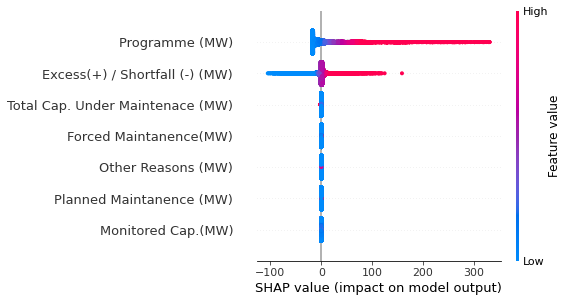

In [ ]:
explainer_sh = shap.LinearExplainer(lin_reg, X_train, feature_dependence='independent')
shap_values_lg = explainer_sh.shap_values(X_test)
shap.summary_plot(shap_values_lg, X_test, feature_names=features.columns)

#2. Tree Model - Shap Analysis

In [ ]:
explainer_tree = shap.Explainer(DTree)
shap_values_tree = explainer_tree(X_test)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


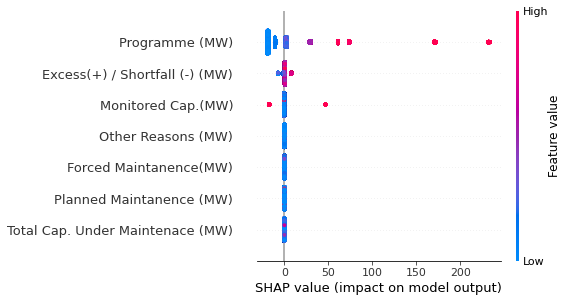

In [ ]:

shap.summary_plot(shap_values_tree, X_test, feature_names=features.columns)

#3. AutoML - Shap Analysis
AutoML has it's on shap analysis method built into the package since the SHAP package has no native support for the models on AutoML.

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,rmse,mse,mae,rmsle,mean_residual_deviance,training_time_ms,predict_time_per_row_ms,algo
DeepLearning_1_AutoML_1_20230325_182506,0.127291,0.016203,0.0394018,0.0254327,0.016203,4611,0.003686,DeepLearning
StackedEnsemble_BestOfFamily_3_AutoML_1_20230325_182506,0.139163,0.0193663,0.0817885,0.0597387,0.0193663,2618,0.161295,StackedEnsemble
StackedEnsemble_AllModels_2_AutoML_1_20230325_182506,0.139246,0.0193894,0.0817412,0.059682,0.0193894,3605,0.176651,StackedEnsemble
StackedEnsemble_AllModels_3_AutoML_1_20230325_182506,0.143633,0.0206305,0.088621,0.0568103,0.0206305,3091,0.183303,StackedEnsemble
StackedEnsemble_AllModels_1_AutoML_1_20230325_182506,0.511981,0.262125,0.244547,nan,0.262125,5882,0.54505,StackedEnsemble
StackedEnsemble_BestOfFamily_2_AutoML_1_20230325_182506,0.52333,0.273874,0.250951,nan,0.273874,3983,0.232598,StackedEnsemble
GLM_1_AutoML_1_20230325_182506,0.595356,0.354449,0.314227,nan,0.354449,753,0.000439,GLM
StackedEnsemble_BestOfFamily_1_AutoML_1_20230325_182506,0.600728,0.360874,0.277218,nan,0.360874,5060,0.271804,StackedEnsemble
GBM_5_AutoML_1_20230325_182506,0.74916,0.56124,0.250586,0.0441756,0.56124,31019,0.16546,GBM
GBM_2_AutoML_1_20230325_182506,0.849851,0.722247,0.285153,0.0505696,0.722247,38631,0.192394,GBM


# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

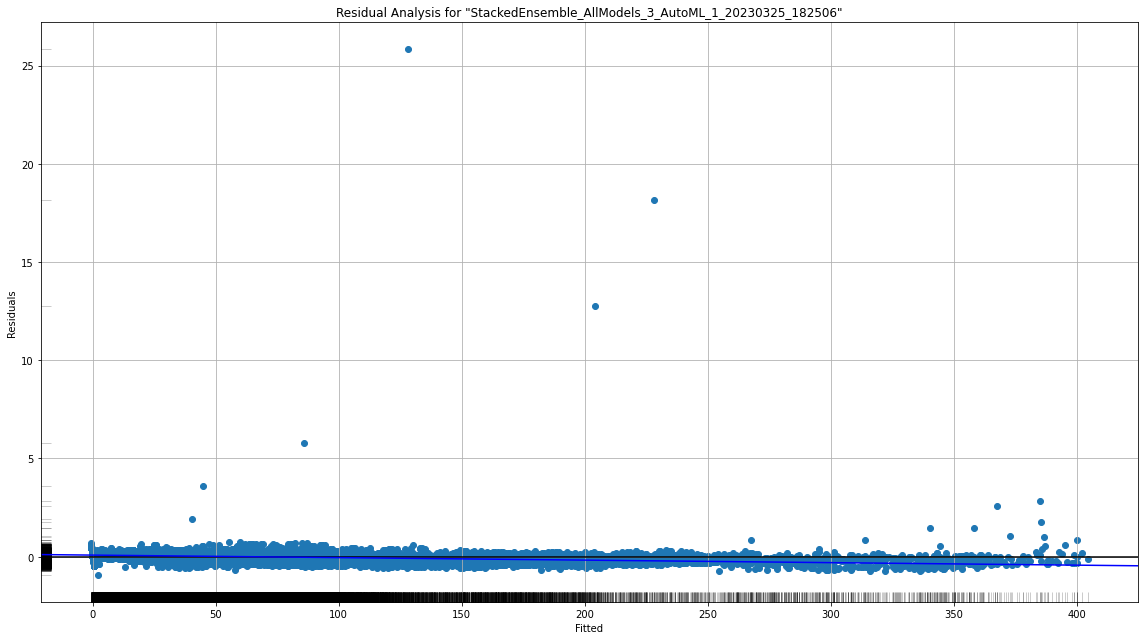

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

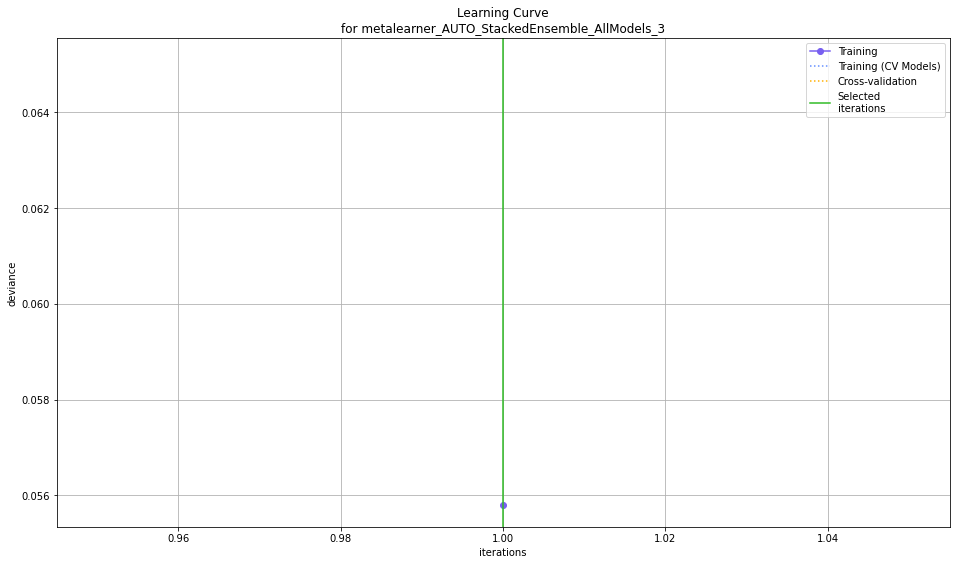

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

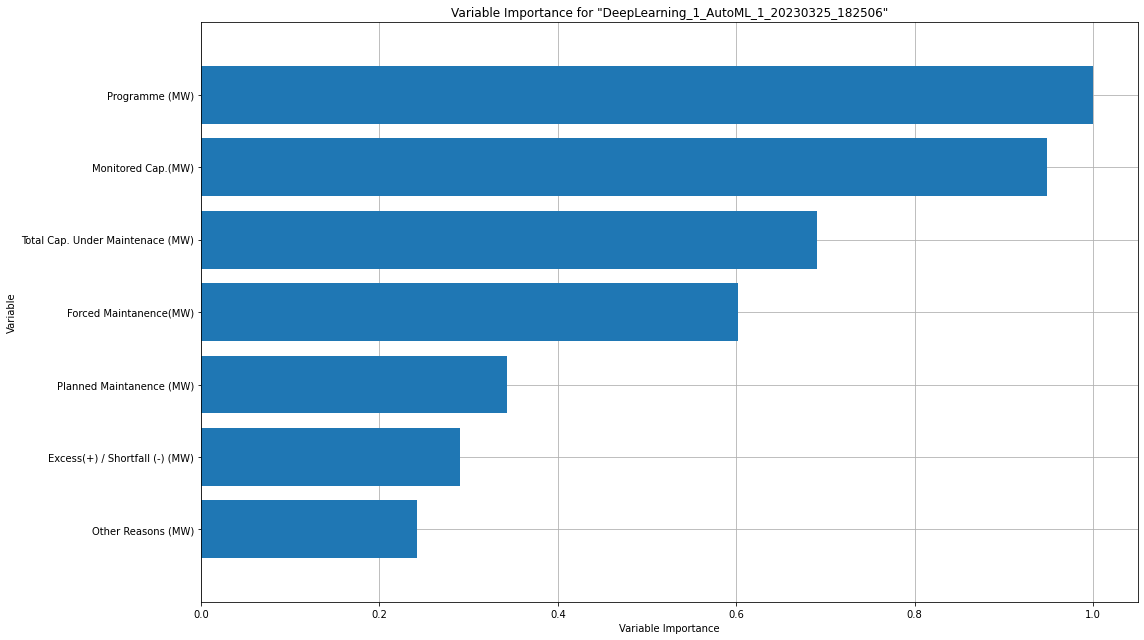

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

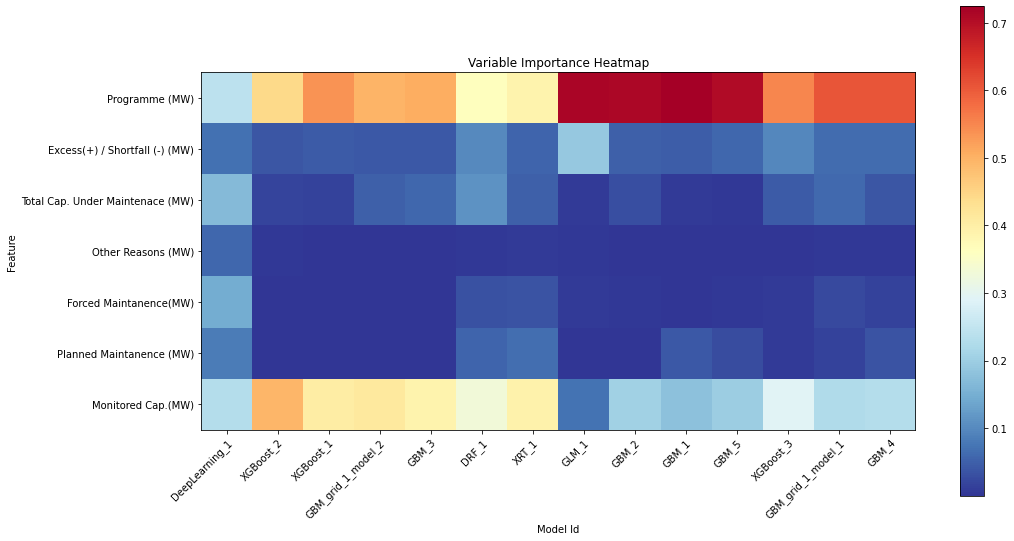

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

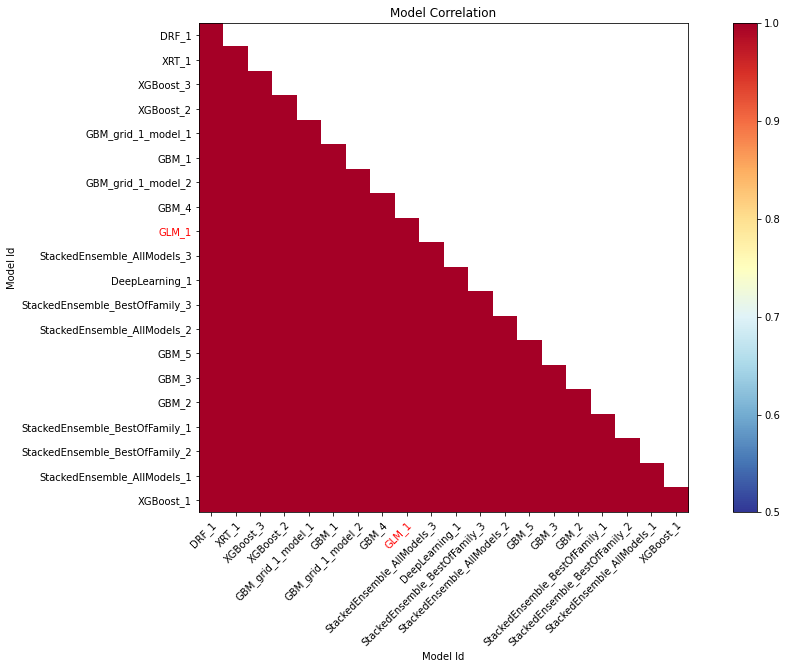

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

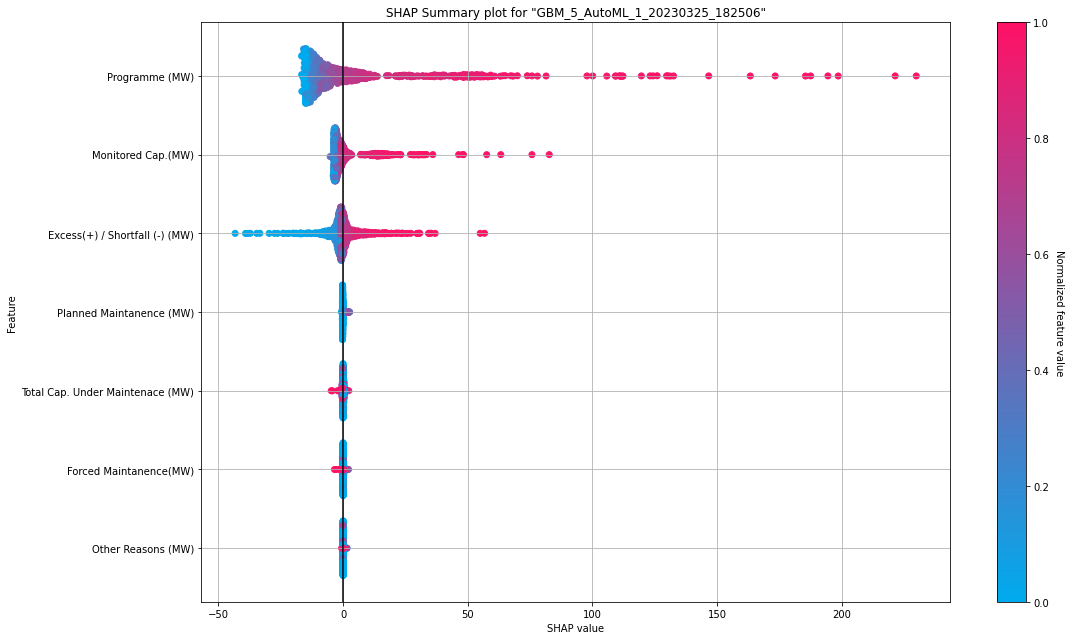

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

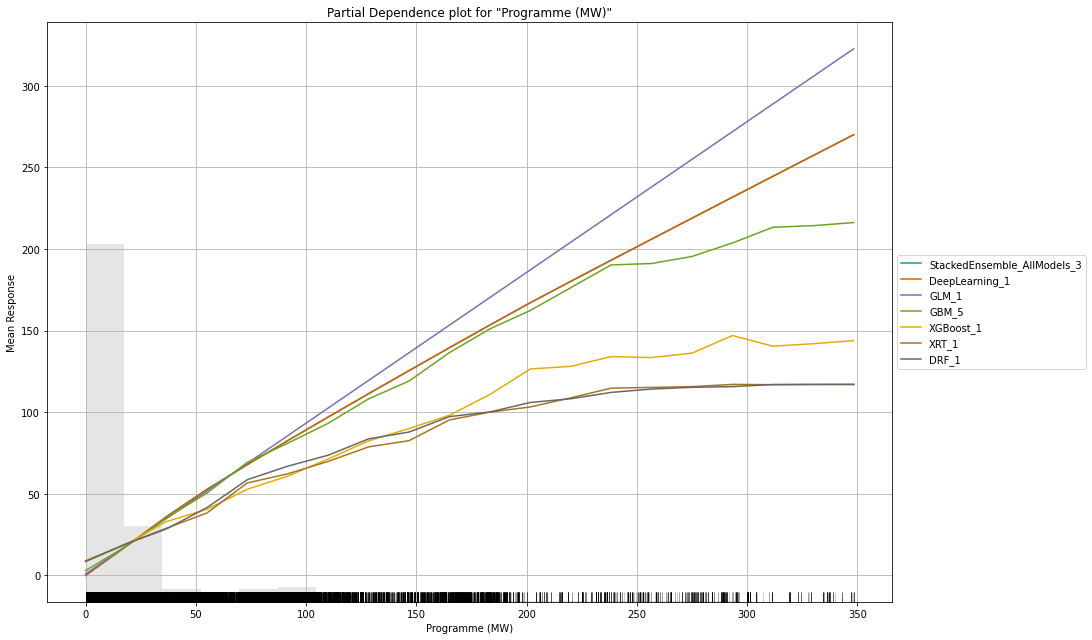

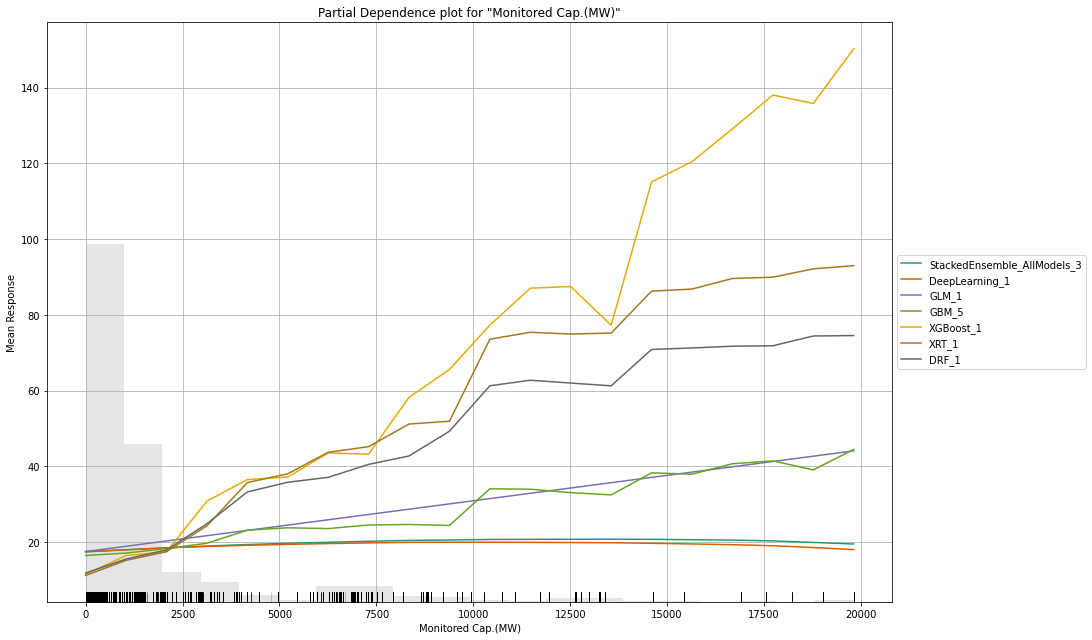

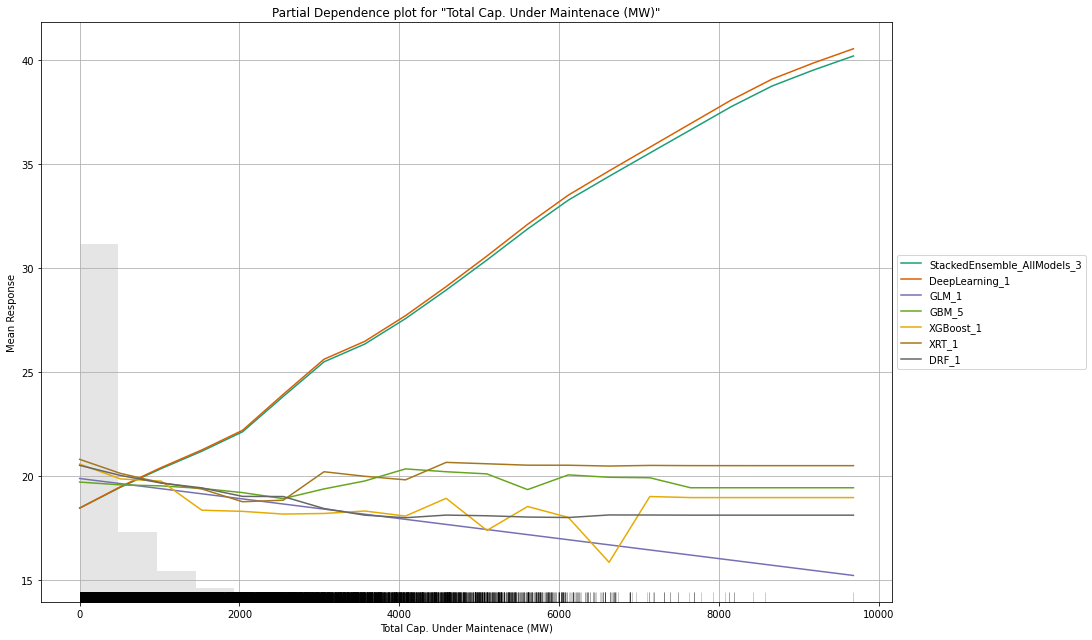

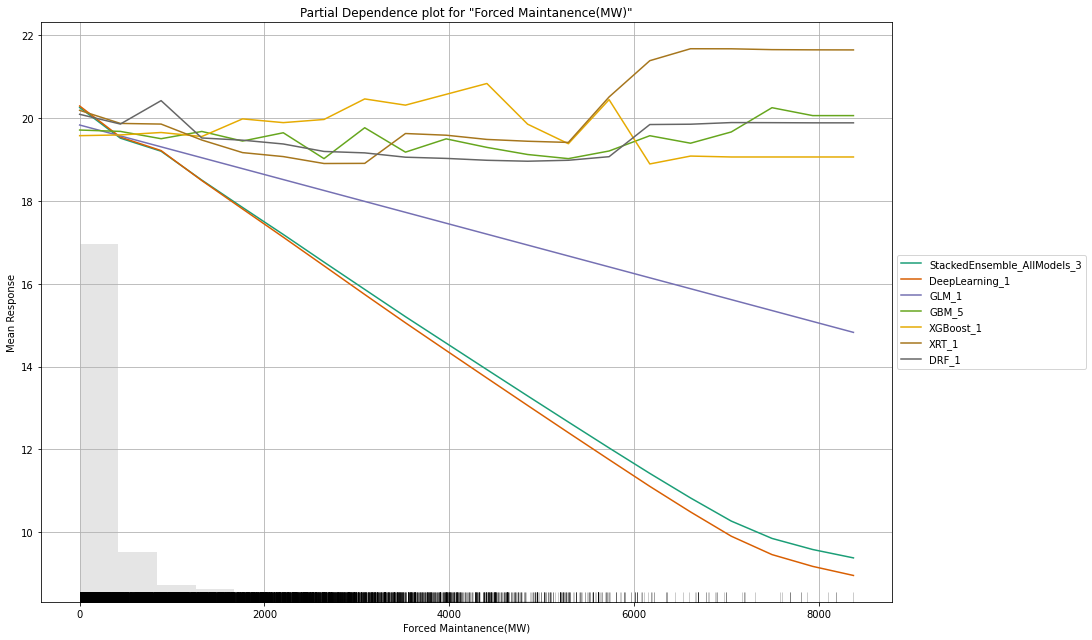

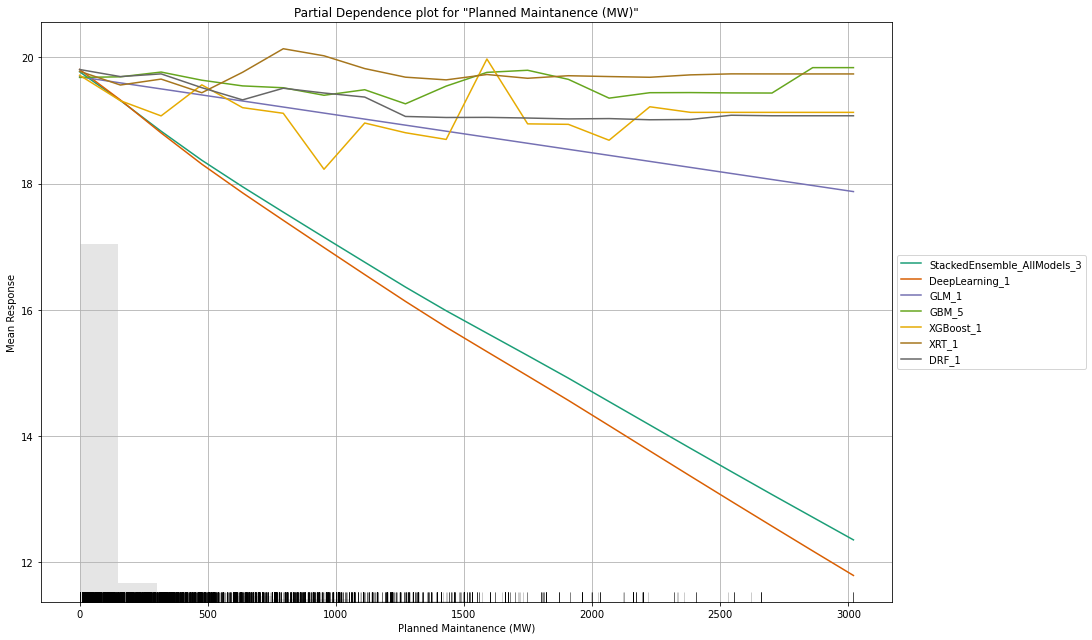

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

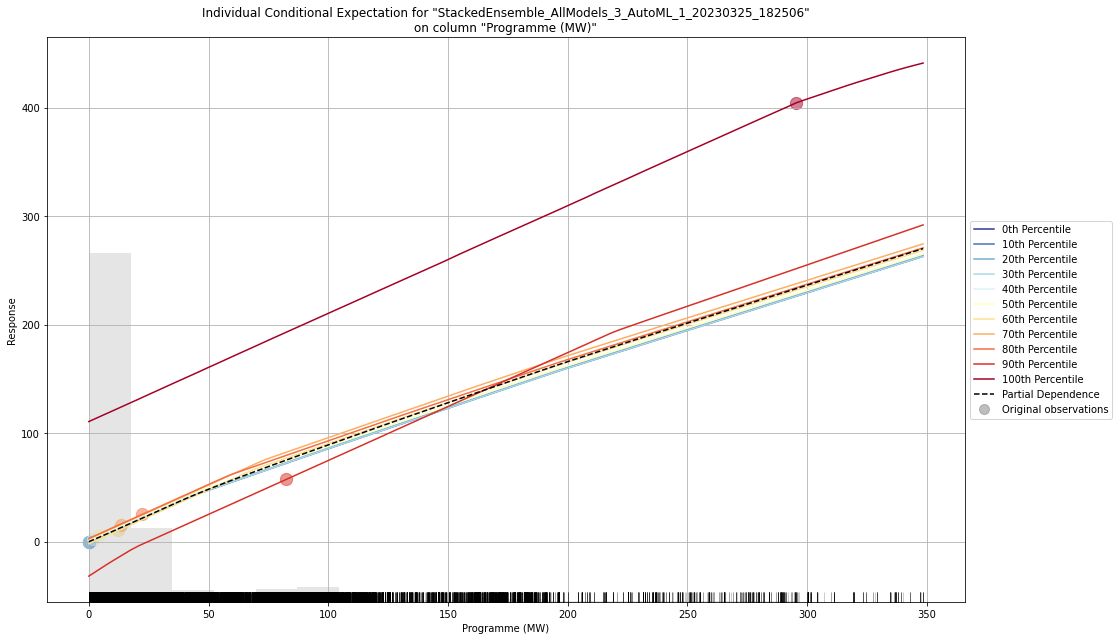

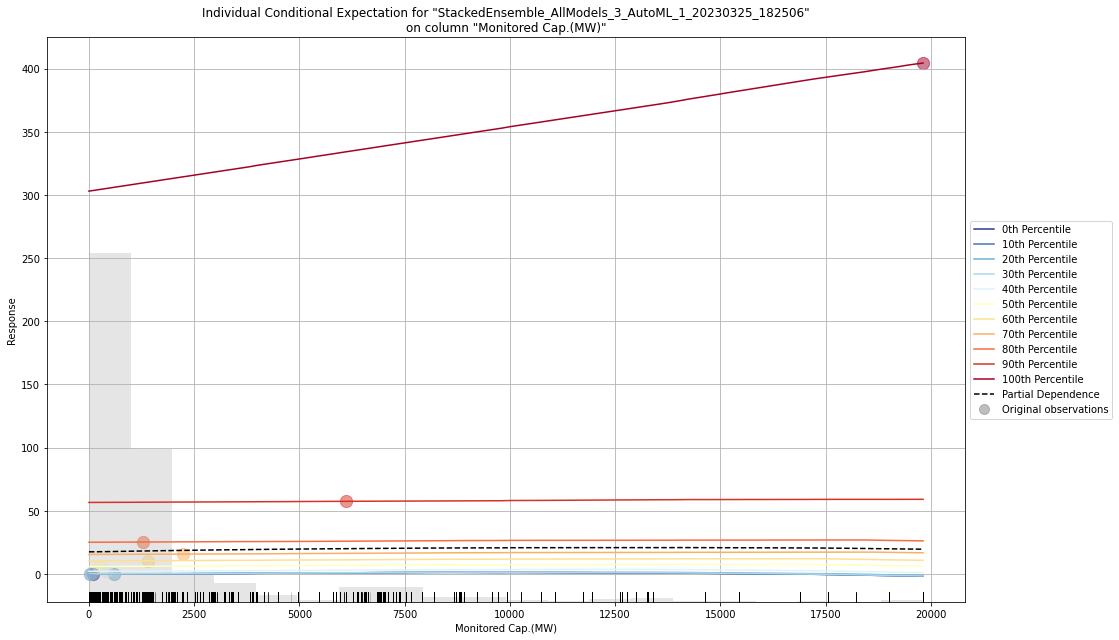

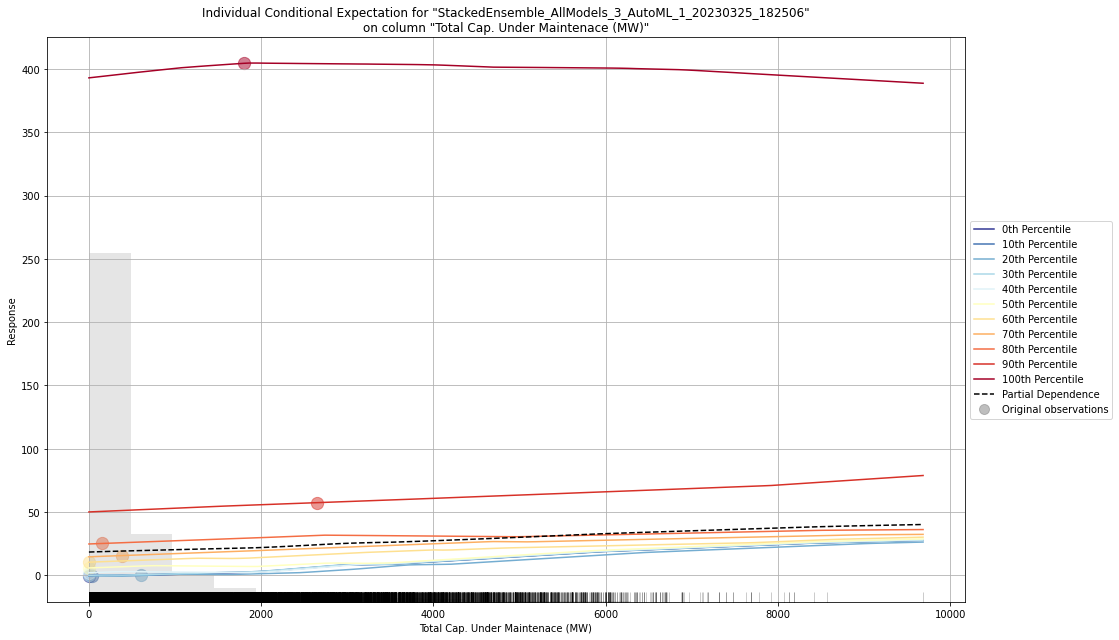

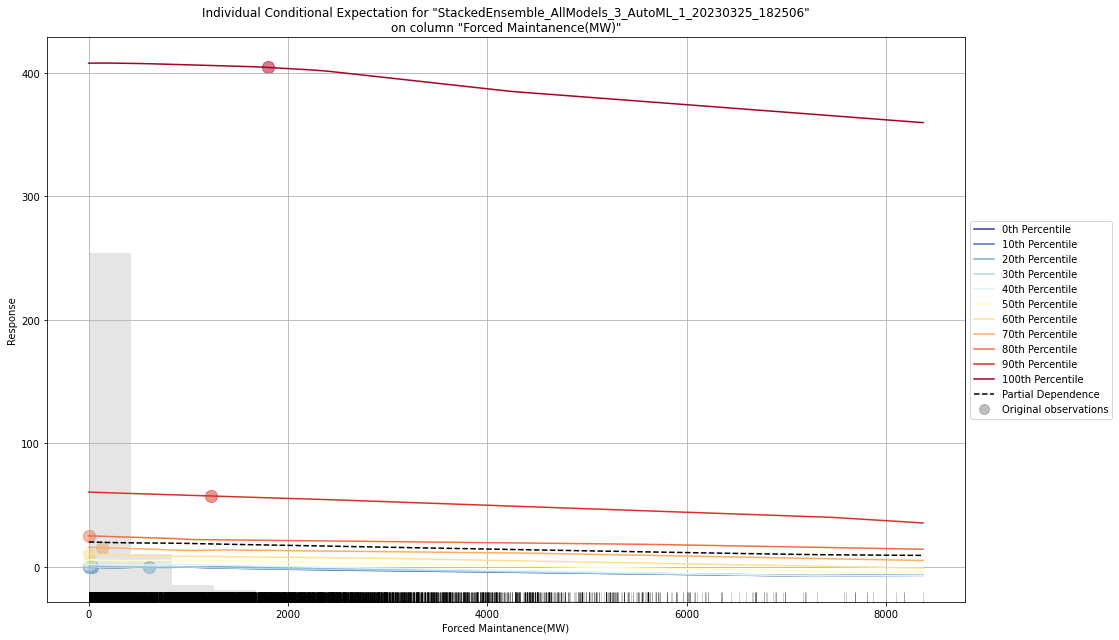

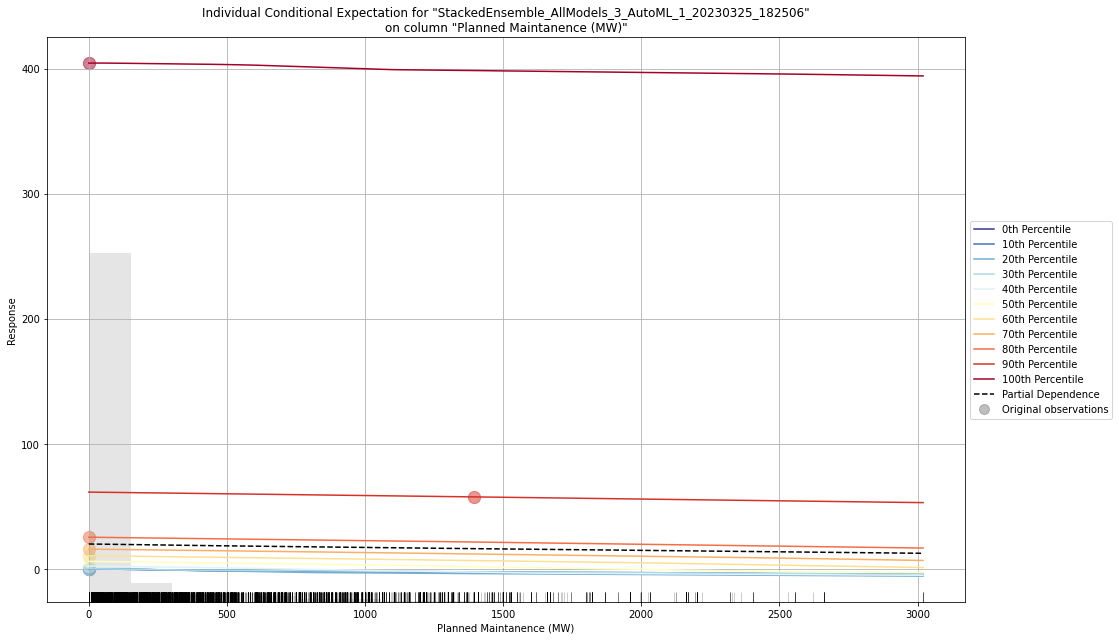

In [ ]:
exm = aml.explain(datasetAutoMLTest)



#LIME (Local Interpretation Model-Agnostic Explanation) Analysis

LIME builds a surrogate model, i.e. converts a more complicated model (say a deep tree-based model into a simple linear model) around the data points in which we are interested and then it will try to make an approximation out of this simple model on the whole model. LIME builds a local model in such a way that it can interpret the whole Black-Box.

• LIME works well on tabular, text, image datasets - hence it works on different datasets

Let us Interpret our Linear model and Tree-based model on sample data (sample_index = 18) using LIME and try to understand what is happening under the hood.

Please refer below for Visualizations of both models

• As we can see on the left-hand side LIME gives us information about the minimum and maximum values predicted by the model. 

The Color orange here represents positive and Blue represents negative
• In Orange category are Planned_maintainance, Monitored Cap(MW) etc

• Where as in the Blue category are Programme(MW), Forced Maintainance(MW) etcf had a negative effect in the linear model but positive in tree-based model

These interpretations were carried out locally in the region where of out sample data(sample_index = 18).
Linear Model

In [ ]:
# Initializing LIME explainer for Linear Model
lime_linear_explainer = lime_tabular.LimeTabularExplainer(training_data=np.array(X_train), feature_names=X_train.columns, mode="regression")

In [ ]:
from sklearn.linear_model import LinearRegression

# create an instance of the linear model
linear_model = LinearRegression()

# train the model
linear_model.fit(X_train, y_train)

LinearRegression()

In [ ]:

# Getting LIME interpretation for a sample data
idx = 18
np_x_test = np.array(X_test)
np_y_test = np.array(y_test)
print("Prediction :", linear_model.predict(np_x_test[0].reshape(1,-1)))
print ( "Actual: ", np_y_test[idx])
lime_linear_explanation = lime_linear_explainer.explain_instance(np_x_test[idx], linear_model.predict, num_features=np_x_test.shape[1])
lime_linear_explanation

Prediction : [28.58000572]
Actual:  0.0


X does not have valid feature names, but LinearRegression was fitted with feature names
X does not have valid feature names, but LinearRegression was fitted with feature names


In [ ]:
lime_linear_explanation.show_in_notebook()

#References

https://towardsdatascience.com/shap-explained-the-way-i-wish-someone-explained-it-to-me-ab81cc69ef30

https://towardsdatascience.com/explain-your-model-with-the-shap-values-bc36aac4de3d

https://medium.com/@kalia_65609/interpreting-an-nlp-model-with-lime-and-shap-834ccfa124e4#:~:text=Unlike%20LIME%2C%20SHAP%20does%20not,to%20calculate%20the%20feature%20importance.

#LICENSE
MIT License

Copyright (c) 2022 Pravallika Pilla

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.